# Pipeline

In [40]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./data/blocks.parquet')[['geometry']]
blocks_gdf.head()

geometry
0  POLYGON ((354918.622 6625258.829, 354901.464 6...
1  POLYGON ((355412.142 6623378.149, 355411.700 6...
2  POLYGON ((353934.329 6625429.433, 353923.453 6...
3  POLYGON ((355099.099 6623847.765, 355074.808 6...
4  POLYGON ((352766.168 6621954.748, 352744.412 6...

## Tagging

### Zoning

In [43]:
from my_package.methods.zoning_tagger import ZoningTagger

zt = ZoningTagger(blocks_gdf)
zoning_gdf = zt.run()

2025-01-23 02:58:04.678 | WARNING  | my_package.methods.zoning_tagger:run:75 - No landuse data is provided
2025-01-23 02:58:04.679 | INFO     | my_package.methods.zoning_tagger:fetch_osm:30 - Fetching OSM data


AttributeError: 'GeoDataFrame' object has no attribute 'union_all'

### Relation

In [32]:
from my_package.methods.relation_tagger import RelationTagger

gdfs = RelationTagger.read_objects_gdfs('./data/serv')

rt = RelationTagger(blocks_gdf, gdfs)
relation_gdf = rt.run()

2025-01-23 02:33:53.805 | SUCCESS  | my_package.methods.relation_tagger:_read_objects_gdf:260 - File read ./data/serv\aerodrome.geojson
2025-01-23 02:33:53.807 | ERROR    | my_package.methods.relation_tagger:_read_objects_gdf:262 -  Can't read file ./data/serv\heliport_centroids.geojson
2025-01-23 02:33:53.826 | SUCCESS  | my_package.methods.relation_tagger:_read_objects_gdf:260 - File read ./data/serv\helipad.geojson
2025-01-23 02:33:53.905 | SUCCESS  | my_package.methods.relation_tagger:_read_objects_gdf:260 - File read ./data/serv\train_station.geojson
2025-01-23 02:33:53.912 | SUCCESS  | my_package.methods.relation_tagger:_read_objects_gdf:260 - File read ./data/serv\bus_station.geojson
2025-01-23 02:33:53.918 | SUCCESS  | my_package.methods.relation_tagger:_read_objects_gdf:260 - File read ./data/serv\marina.geojson
2025-01-23 02:33:53.933 | SUCCESS  | my_package.methods.relation_tagger:_read_objects_gdf:260 - File read ./data/serv\parking.geojson
2025-01-23 02:33:54.747 | SUCCESS

### Spatial

In [39]:
from my_package.methods.spatial_tagger import SpatialTagger

st = SpatialTagger(blocks_gdf)
spatial_gdf = st.run()

2025-01-23 02:53:19.807 | INFO     | my_package.methods.spatial_tagger:_fetch_osm:35 - Fetching OSM data


AttributeError: 'GeoDataFrame' object has no attribute 'union_all'

## Matrix solver

In [42]:
from my_package.methods.matrix_solver import MatrixSolver

ms = MatrixSolver(blocks_gdf, [zoning_gdf, spatial_gdf, relation_gdf])
requirements_gdf = ms.run()

NameError: name 'zoning_gdf' is not defined

In [8]:
requirements_gdf

geometry  \
0      POLYGON ((354918.622 6625258.829, 354901.464 6...   
1      POLYGON ((355412.142 6623378.149, 355411.7 662...   
2      POLYGON ((353934.329 6625429.433, 353923.453 6...   
3      POLYGON ((355099.099 6623847.765, 355074.808 6...   
4      POLYGON ((352766.168 6621954.748, 352744.412 6...   
...                                                  ...   
16315  POLYGON ((335210.252 6655823.328, 335105.217 6...   
16316  POLYGON ((315582.435 6679561.357, 315523.467 6...   
16317  POLYGON ((316419.909 6679189.653, 316319.749 6...   
16318  POLYGON ((315709.232 6679519.841, 315748.877 6...   
16319  POLYGON ((334750.064 6619025.201, 334749.14 66...   

                                                    tags  \
0      [Tag.PUBLIC_AND_BUSINESS, Tag.NON_LIVING, Tag....   
1      [Tag.ENGINEERING_AND_TRANSPORTATION, Tag.NON_L...   
2      [Tag.NON_LIVING, Tag.LOW_RISE, Tag.LOW_DENSITY...   
3      [Tag.RESIDENTIAL, Tag.LIVING, Tag.LOW_RISE, Ta...   
4      [Tag.RESIDENTIAL, Tag.NON_LIVING, Tag.LOW_RISE...   
...                                                  ...   
16315                                  [Tag.LOW_DENSITY]   
16316                                  [Tag.LOW_DENSITY]   
16317  [Tag.ENGINEERING_AND_TRANSPORTATION, Tag.LOW_D...   
16318  [Tag.ENGINEERING_AND_TRANSPORTATION, Tag.LOW_D...   
16319  [Tag.SPECIAL_PURPOSE, Tag.LIVING, Tag.LOW_RISE...   

                                 obligatory_requirements  \
0      [Requirement.TRANSPORT_PLACEMENT_DISTRICT, Req...   
1      [Requirement.TRANSPORT_PLACEMENT_DISTRICT, Req...   
2      [Requirement.TRANSPORT_PLACEMENT_DISTRICT, Req...   
3      [Requirement.TRANSPORT_PLACEMENT_DISTRICT, Req...   
4      [Requirement.TRANSPORT_PLACEMENT_DISTRICT, Req...   
...                                                  ...   
16315  [Requirement.TRANSPORT_PLACEMENT_LOCAL, Requir...   
16316  [Requirement.TRANSPORT_PLACEMENT_LOCAL, Requir...   
16317  [Requirement.TRANSPORT_PLACEMENT_DISTRICT, Req...   
16318  [Requirement.TRANSPORT_PLACEMENT_DISTRICT, Req...   
16319  [Requirement.TRANSPORT_PLACEMENT_DISTRICT, Req...   

                                  forbidden_requirements  
0                                                     []  
1                [Requirement.OBJECT_PLACEMENT_CULTURAL]  
2                                                     []  
3                                                     []  
4                                                     []  
...                                                  ...  
16315                                                 []  
16316                                                 []  
16317            [Requirement.OBJECT_PLACEMENT_CULTURAL]  
16318            [Requirement.OBJECT_PLACEMENT_CULTURAL]  
16319  [Requirement.PUBLIC_SPACE_CITY, Requirement.PU...  

[16320 rows x 4 columns]

## Visualization

/tmp/ipykernel_117853/2236894486.py:8: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  requirements_gdf[requirements_gdf['forbidden_requirements'].apply(lambda reqs : req in reqs)].plot(color='red', ax=ax)
/tmp/ipykernel_117853/2236894486.py:8: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  requirements_gdf[requirements_gdf['forbidden_requirements'].apply(lambda reqs : req in reqs)].plot(color='red', ax=ax)
/tmp/ipykernel_117853/2236894486.py:8: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  requirements_gdf[requirements_gdf['forbidden_requirements'].apply(lambda reqs : req in reqs)].plot(color='red', ax=ax)
/tmp/ipykernel_117853/2236894486.py:8: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  requirements_gdf[requirements_gdf['forbidden_requirements'].apply(lambda reqs : req in reqs)].plot(

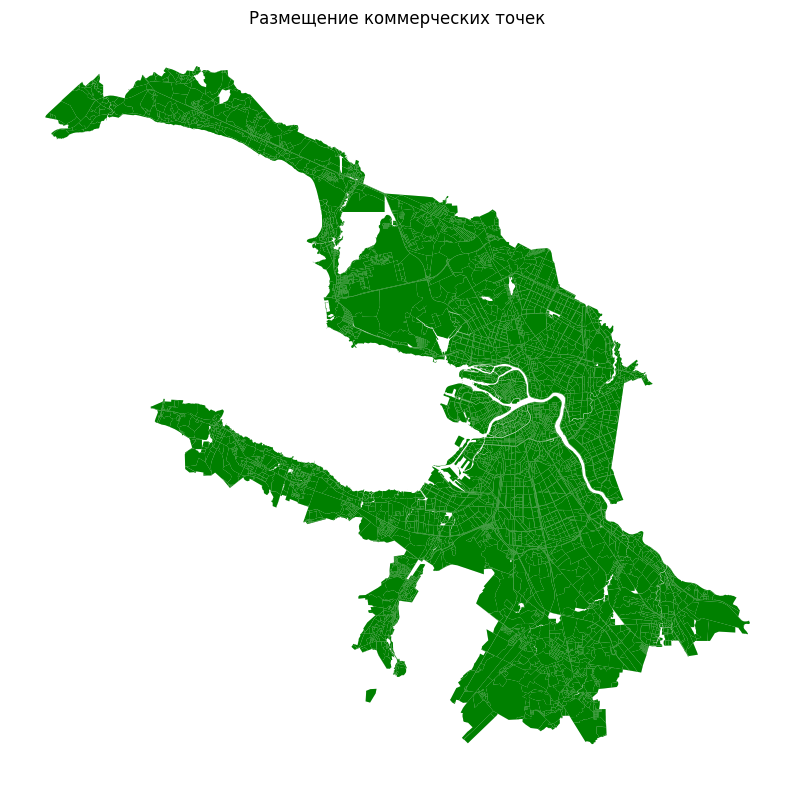

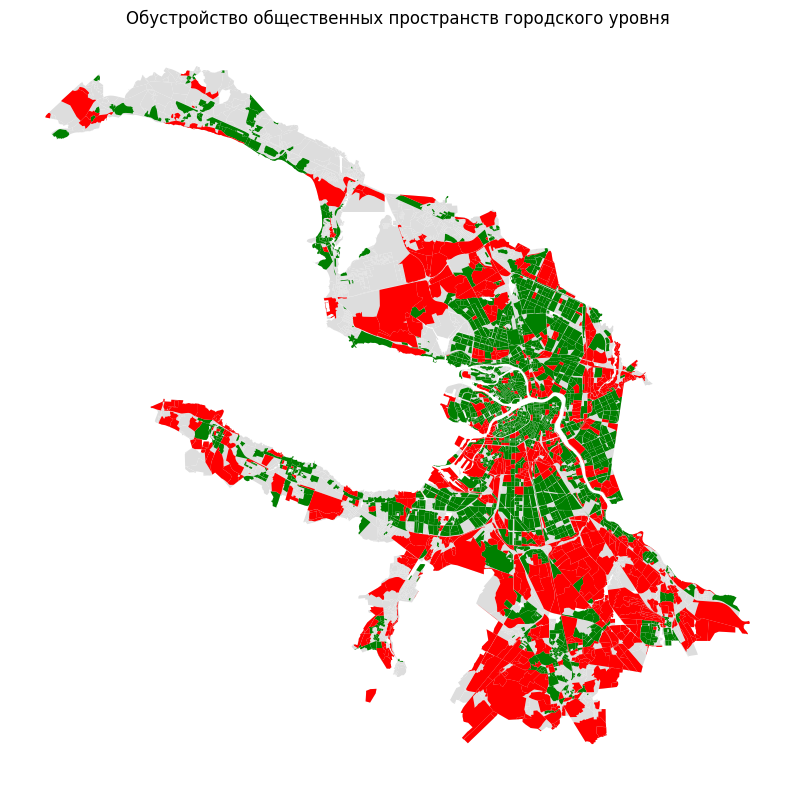

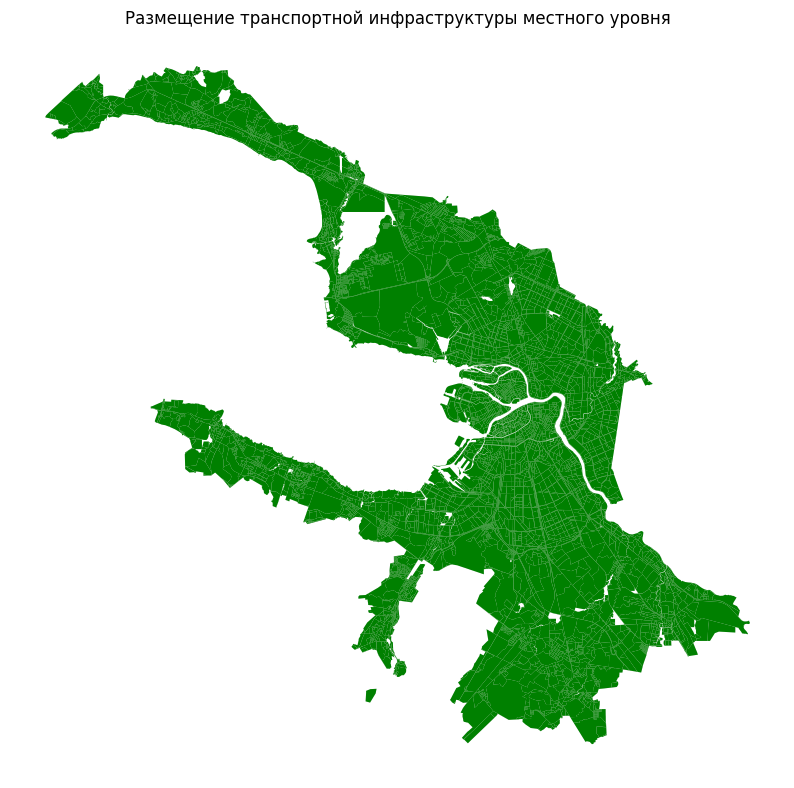

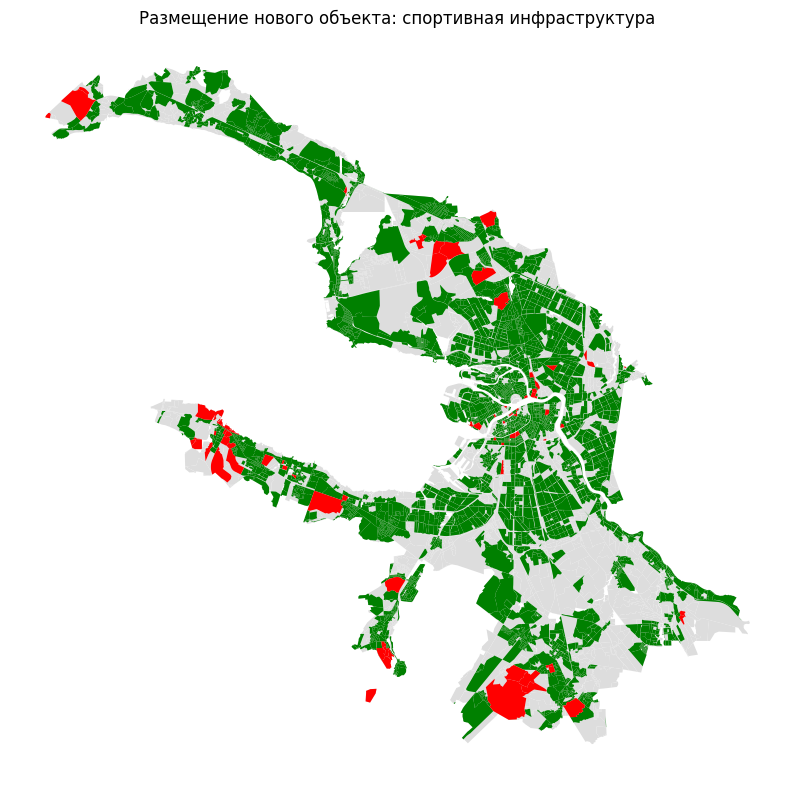

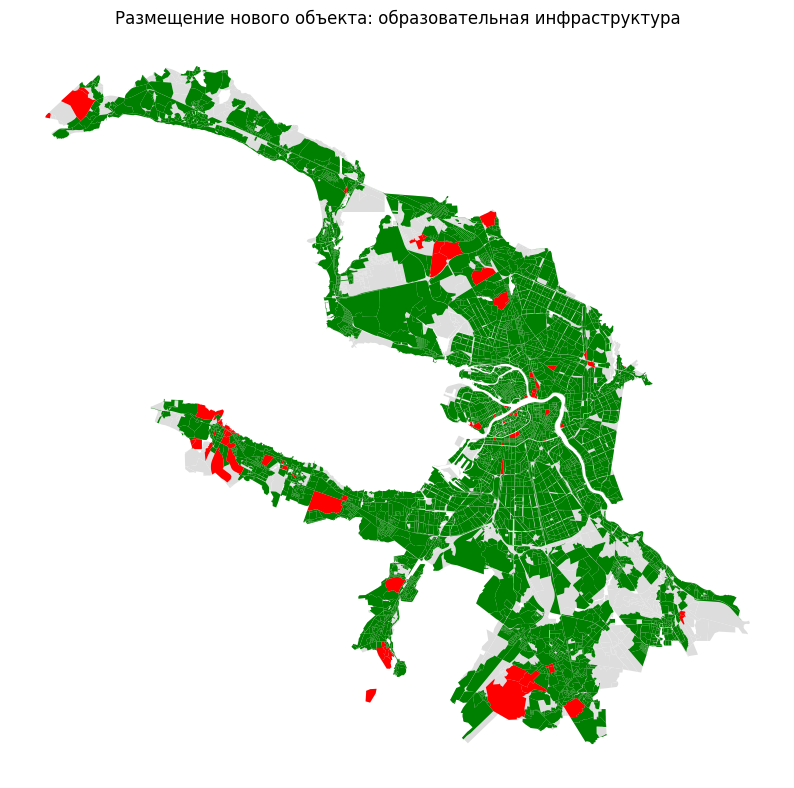

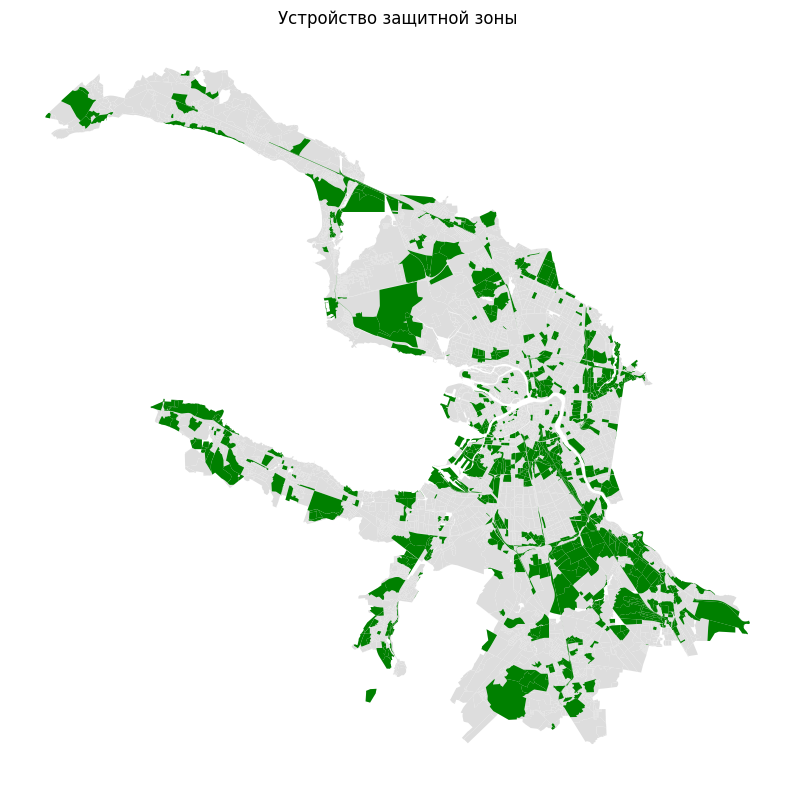

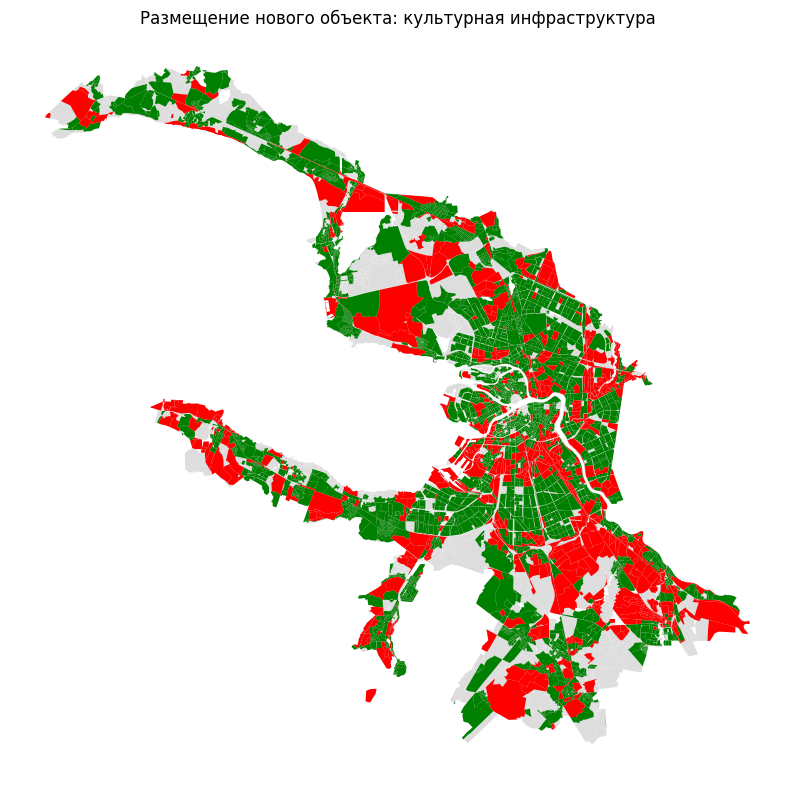

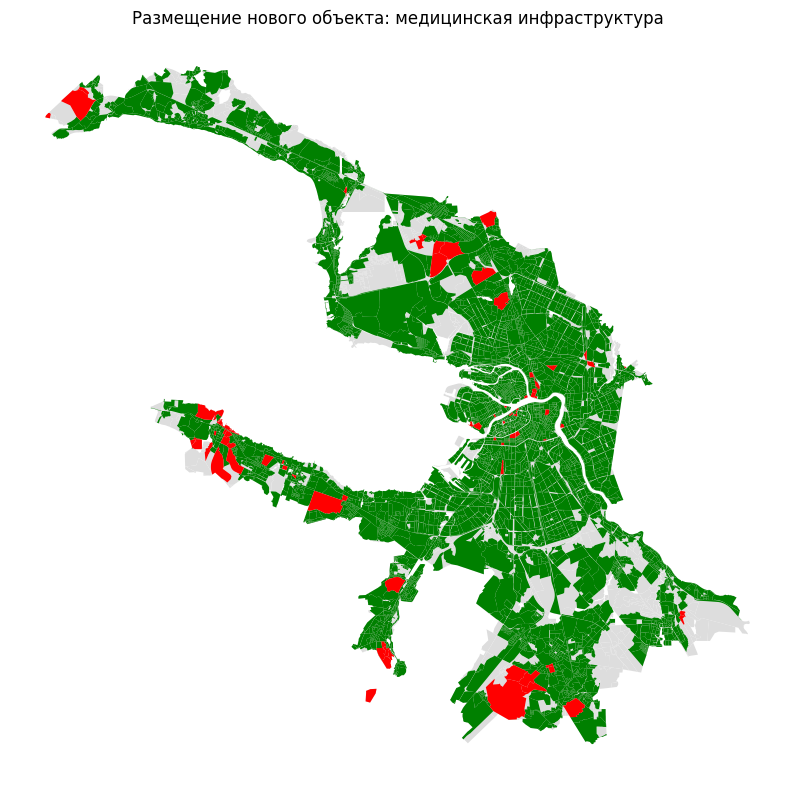

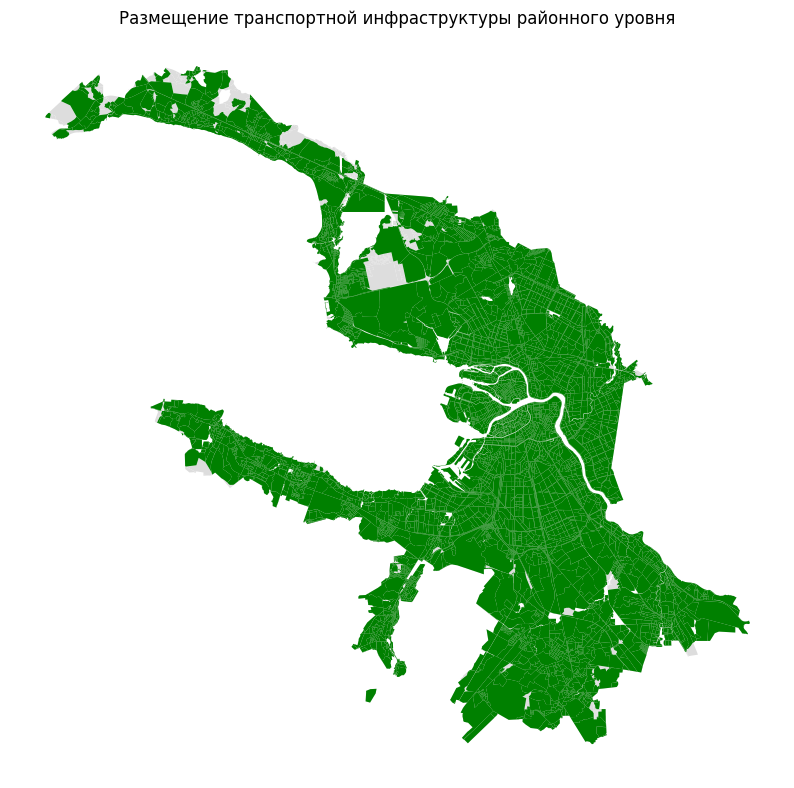

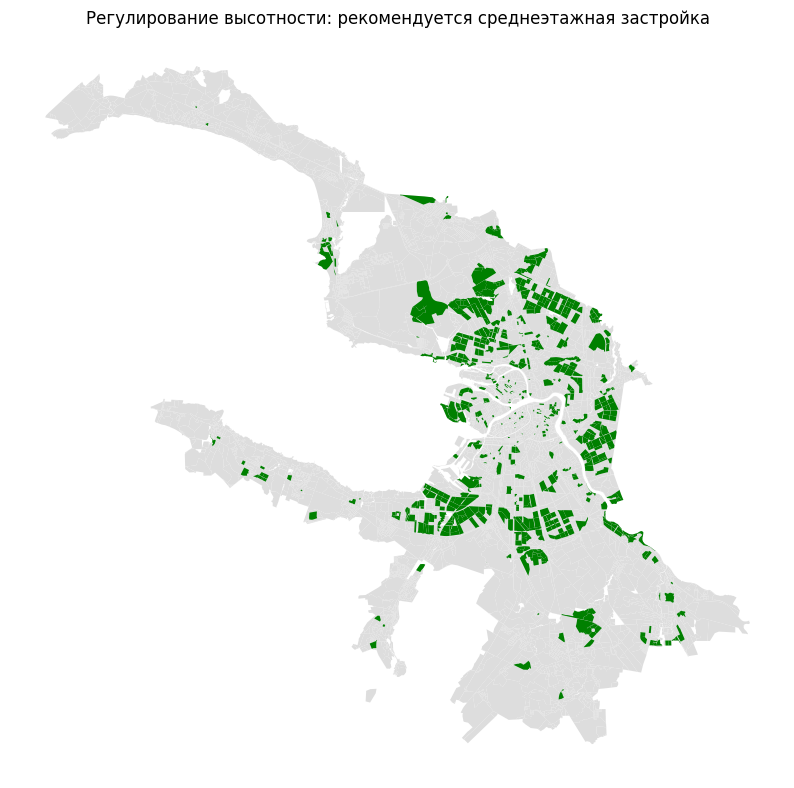

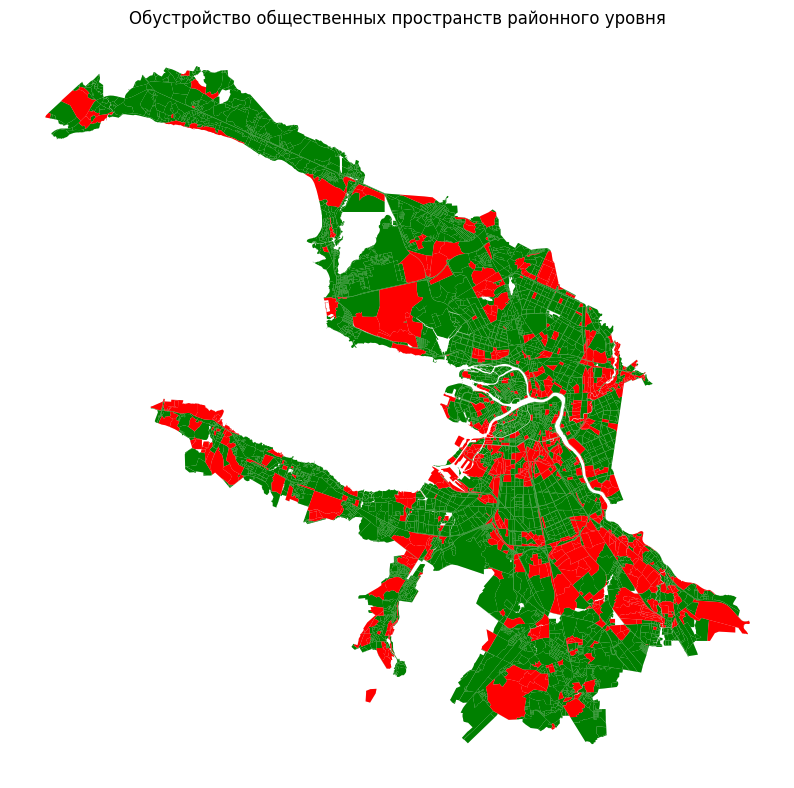

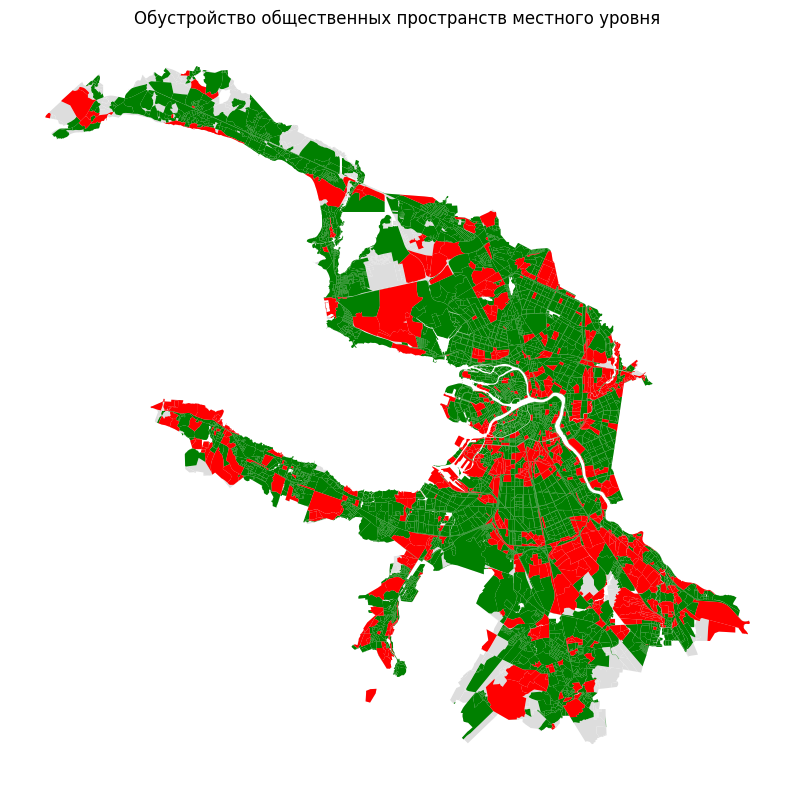

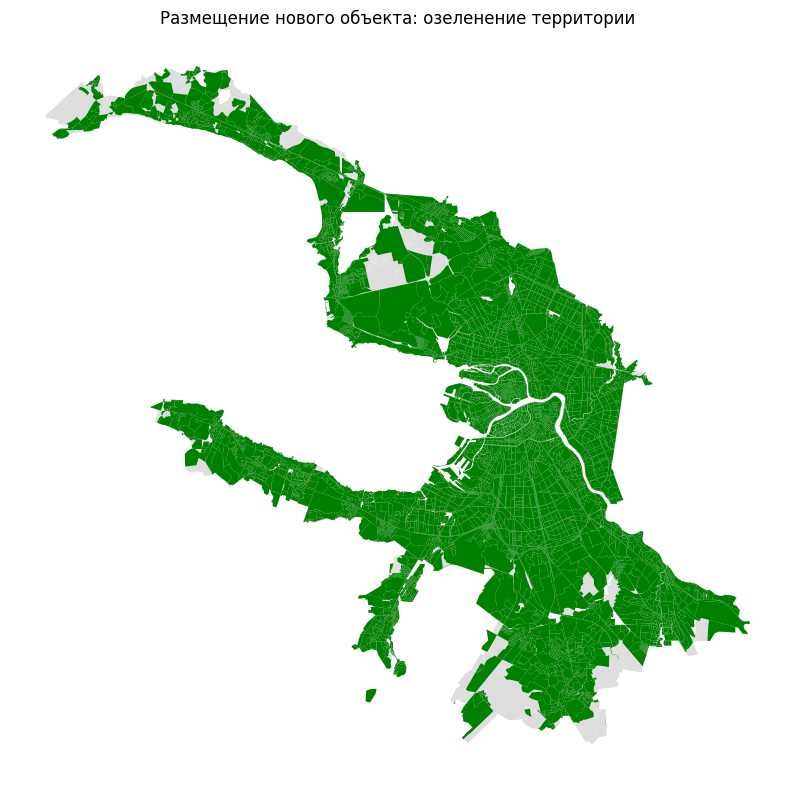

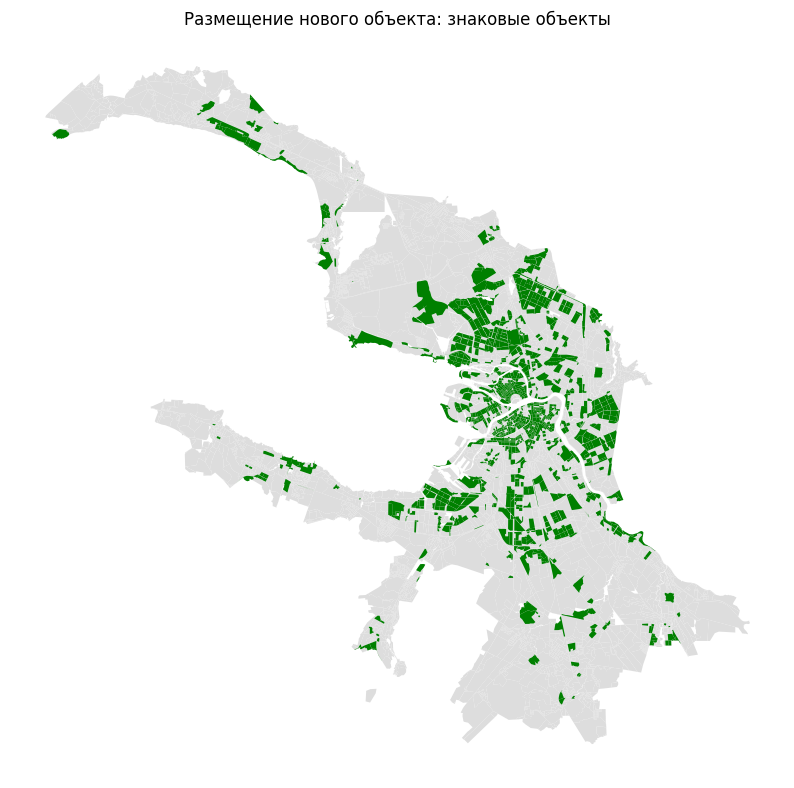

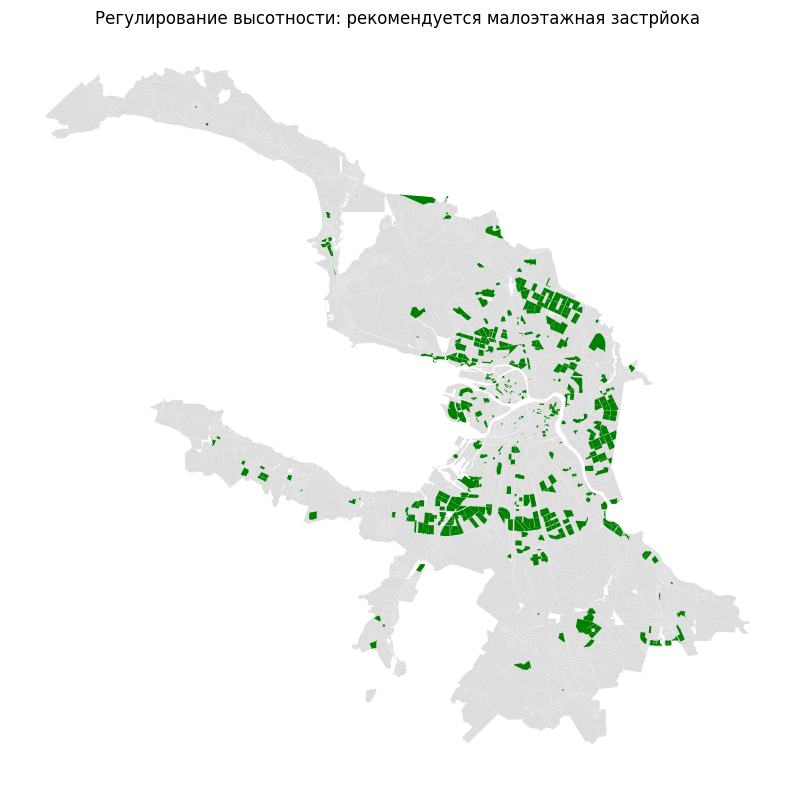

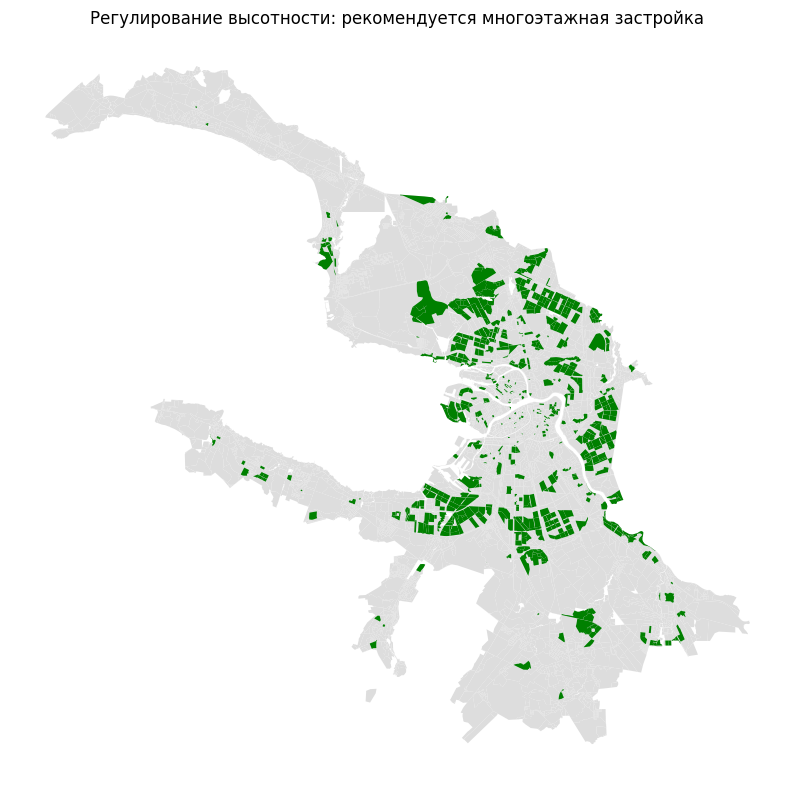

In [9]:
obligatory_requirements = {req for reqs in requirements_gdf['obligatory_requirements'] for req in reqs}
forbidden_requirements = {req for reqs in requirements_gdf['forbidden_requirements'] for req in reqs}
all_requirements = {*obligatory_requirements, *forbidden_requirements}

for req in all_requirements:
    ax = requirements_gdf.plot(figsize=(10,10), color='#ddd')
    requirements_gdf[requirements_gdf['obligatory_requirements'].apply(lambda reqs : req in reqs)].plot(color='green', ax=ax)
    requirements_gdf[requirements_gdf['forbidden_requirements'].apply(lambda reqs : req in reqs)].plot(color='red', ax=ax)
    ax.set_title(req.value)
    ax.set_axis_off()